In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor 
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [3]:
orig_train_df = pd.read_csv('Train_Data.csv')
orig_train_df.head(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [4]:
orig_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
impressions,4571.0,92.635747,198.349737,1.0,6.00,16.00,84.00,3239.00
clicks,4571.0,43.340844,100.164913,0.0,2.00,7.00,38.00,1771.00
cost,4571.0,2.800834,14.361618,0.0,0.04,0.21,1.35,531.25
conversions,4571.0,1.339094,5.223922,0.0,0.00,0.00,1.00,94.00
revenue,4571.0,231.865340,1091.742763,0.0,0.00,0.00,92.60,20515.41


In [5]:
orig_train_df.isna().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [6]:
orig_train_df.date.unique()

array(['01-08-2020', '02-08-2020', '03-08-2020', '04-08-2020',
       '05-08-2020', '06-08-2020', '07-08-2020', '08-08-2020',
       '09-08-2020', '10-08-2020', '11-08-2020', '12-08-2020',
       '13-08-2020', '14-08-2020', '15-08-2020', '16-08-2020',
       '17-08-2020', '18-08-2020', '19-08-2020', '20-08-2020',
       '21-08-2020', '22-08-2020', '23-08-2020', '24-08-2020',
       '25-08-2020', '26-08-2020', '27-08-2020', '28-08-2020',
       '29-08-2020', '30-08-2020', '31-08-2020', '01-09-2020',
       '02-09-2020', '03-09-2020', '04-09-2020', '05-09-2020',
       '06-09-2020', '07-09-2020', '08-09-2020', '09-09-2020',
       '10-09-2020', '11-09-2020', '12-09-2020', '13-09-2020',
       '14-09-2020', '15-09-2020', '16-09-2020', '17-09-2020',
       '18-09-2020', '19-09-2020', '20-09-2020', '21-09-2020',
       '22-09-2020', '23-09-2020', '24-09-2020', '25-09-2020',
       '26-09-2020', '27-09-2020', '28-09-2020', '29-09-2020',
       '30-09-2020', '01-10-2020', '02-10-2020', '03-10

In [7]:
df = orig_train_df.copy()
df.drop(['ad','campaign'],axis=1,inplace=True)
df.head()

,date,adgroup,impressions,clicks,cost,conversions,revenue
0,01-08-2020,adgroup 1,24,6,0.08,0,0.00
1,01-08-2020,adgroup 2,1,0,0.00,0,0.00
2,01-08-2020,adgroup 3,13,4,0.04,0,0.00
3,01-08-2020,adgroup 4,5,4,0.08,0,0.00
4,01-08-2020,adgroup 1,247,126,1.29,4,925.71


In [8]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,adgroup,impressions,clicks,cost,conversions,revenue
0,2020-01-08,adgroup 1,24,6,0.08,0,0.00
1,2020-01-08,adgroup 2,1,0,0.00,0,0.00
2,2020-01-08,adgroup 3,13,4,0.04,0,0.00
3,2020-01-08,adgroup 4,5,4,0.08,0,0.00
4,2020-01-08,adgroup 1,247,126,1.29,4,925.71


In [9]:
df.dtypes

date           datetime64[ns]
adgroup                object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

In [10]:
df.corr().T

,impressions,clicks,cost,conversions,revenue
impressions,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,0.987514,1.000000,0.719925,0.856941,0.798282
cost,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,0.759671,0.798282,0.581662,0.964096,1.000000


In [11]:
date = pd.DataFrame(df.date)
temp = pd.get_dummies(df.adgroup,drop_first=True)
temp = pd.concat([date,temp],axis=1)
df.drop(['date','adgroup'],axis=1,inplace=True)
df = pd.concat([temp,df],axis=1)
df.head()

,date,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,revenue
0,2020-01-08,0,0,0,24,6,0.08,0,0.00
1,2020-01-08,1,0,0,1,0,0.00,0,0.00
2,2020-01-08,0,1,0,13,4,0.04,0,0.00
3,2020-01-08,0,0,1,5,4,0.08,0,0.00
4,2020-01-08,0,0,0,247,126,1.29,4,925.71


In [12]:
df['CTR'] = df['clicks'].astype(float)/df['impressions'].astype(float)
df['CPC'] = df['cost'].astype(float)/df['clicks'].astype(float)
df.head()

,date,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,revenue,CTR,CPC
0,2020-01-08,0,0,0,24,6,0.08,0,0.00,0.250000,0.013333
1,2020-01-08,1,0,0,1,0,0.00,0,0.00,0.000000,NaN
2,2020-01-08,0,1,0,13,4,0.04,0,0.00,0.307692,0.010000
3,2020-01-08,0,0,1,5,4,0.08,0,0.00,0.800000,0.020000
4,2020-01-08,0,0,0,247,126,1.29,4,925.71,0.510121,0.010238


In [13]:
df.isna().sum()

date             0
adgroup 2        0
adgroup 3        0
adgroup 4        0
impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
dtype: int64

In [14]:
df.CPC = df.CPC.fillna(0)

In [15]:
df.isna().sum()

date           0
adgroup 2      0
adgroup 3      0
adgroup 4      0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
dtype: int64

In [16]:
df.head(10)

,date,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,revenue,CTR,CPC
0,2020-01-08,0,0,0,24,6,0.08,0,0.00,0.250000,0.013333
1,2020-01-08,1,0,0,1,0,0.00,0,0.00,0.000000,0.000000
2,2020-01-08,0,1,0,13,4,0.04,0,0.00,0.307692,0.010000
3,2020-01-08,0,0,1,5,4,0.08,0,0.00,0.800000,0.020000
4,2020-01-08,0,0,0,247,126,1.29,4,925.71,0.510121,0.010238
5,2020-01-08,1,0,0,7,2,0.04,0,0.00,0.285714,0.020000
6,2020-01-08,0,0,1,6,3,0.05,0,0.00,0.500000,0.016667
7,2020-01-08,0,0,0,129,52,0.58,0,0.00,0.403101,0.011154
8,2020-01-08,0,1,0,104,56,0.56,0,0.00,0.538462,0.010000
9,2020-01-08,0,0,1,6,5,0.05,0,0.00,0.833333,0.010000


In [17]:
day = df.date.dt.day
day.name = 'day'
month = df.date.dt.month
month.name = 'month'
df = pd.concat([day,month,df],axis=1)
df.drop(['date'],axis=1,inplace=True)
df.head()

,day,month,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,revenue,CTR,CPC
0,8,1,0,0,0,24,6,0.08,0,0.00,0.250000,0.013333
1,8,1,1,0,0,1,0,0.00,0,0.00,0.000000,0.000000
2,8,1,0,1,0,13,4,0.04,0,0.00,0.307692,0.010000
3,8,1,0,0,1,5,4,0.08,0,0.00,0.800000,0.020000
4,8,1,0,0,0,247,126,1.29,4,925.71,0.510121,0.010238


In [18]:
temp = df.revenue
df.drop(['revenue'],axis=1,inplace=True)
df = pd.concat([df,temp],axis=1)
df.head()

,day,month,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,CTR,CPC,revenue
0,8,1,0,0,0,24,6,0.08,0,0.250000,0.013333,0.00
1,8,1,1,0,0,1,0,0.00,0,0.000000,0.000000,0.00
2,8,1,0,1,0,13,4,0.04,0,0.307692,0.010000,0.00
3,8,1,0,0,1,5,4,0.08,0,0.800000,0.020000,0.00
4,8,1,0,0,0,247,126,1.29,4,0.510121,0.010238,925.71


In [19]:
df['day_cos'] = np.cos(2*np.pi*df.day/31.0)
df['day_sin'] = np.sin(2*np.pi*df.day/31.0)
df.drop(['day','month'],axis=1,inplace=True)

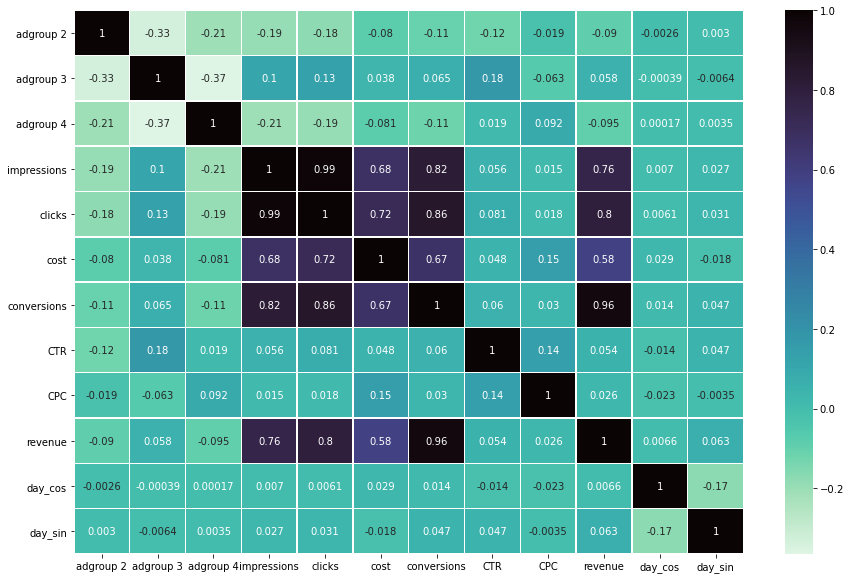

In [20]:
cm = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=cm,cbar=True,cmap='mako_r',linewidths=0.5,annot=True)
plt.show()

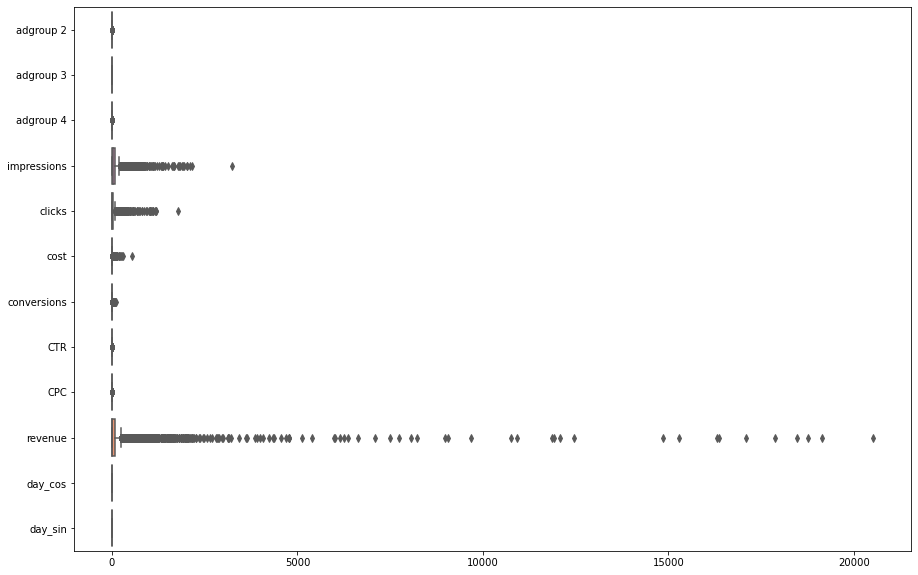

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.show()

In [22]:
def plot_helper(col, data):
    print('\t',col,'\n','*'*30)
    print(data[col].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.995]))
    
    #Plots
    plt.figure(figsize=(15,8))
    
    #Boxplot for the column
    plt.subplot(1,2,1)
    sns.boxplot(data[col], color='cyan')
    plt.title('Boxplot for '+col)
    plt.xlabel(' ')
    
    #Distribution plot of the column
    plt.subplot(1,2,2)
    sns.distplot(data[col])
    plt.title('Distribution plot for '+col)
    plt.xlabel(' ')
    
    plt.show()

	 clicks 
 ******************************
count    4571.000000
mean       43.340844
std       100.164913
min         0.000000
25%         2.000000
50%         7.000000
75%        38.000000
90%       130.000000
95%       216.500000
97%       270.800000
99%       391.800000
99.5%     635.300000
max      1771.000000
Name: clicks, dtype: float64


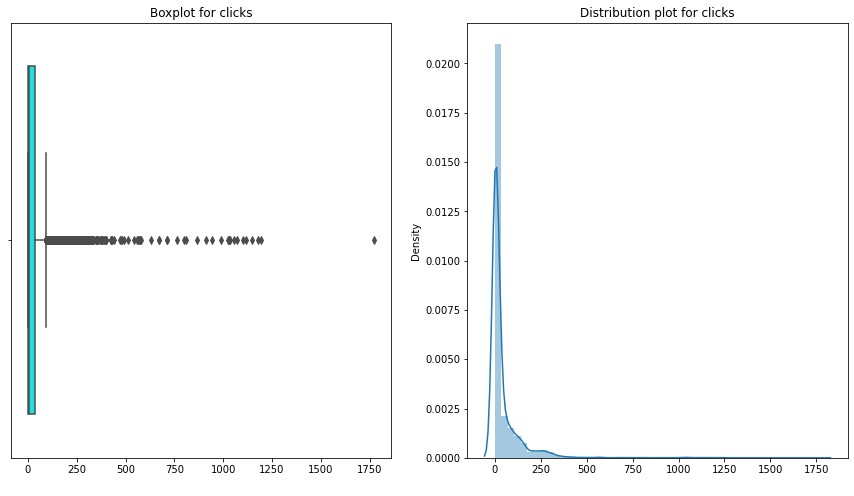

In [23]:
plot_helper('clicks',df)

In [24]:
df = df[~(df['clicks']>df['clicks'].quantile(0.995))]

	 clicks 
 ******************************
count    4548.000000
mean       38.592348
std        72.972982
min         0.000000
25%         2.000000
50%         7.000000
75%        36.000000
90%       126.000000
95%       203.000000
97%       261.000000
99%       328.530000
99.5%     391.590000
max       629.000000
Name: clicks, dtype: float64


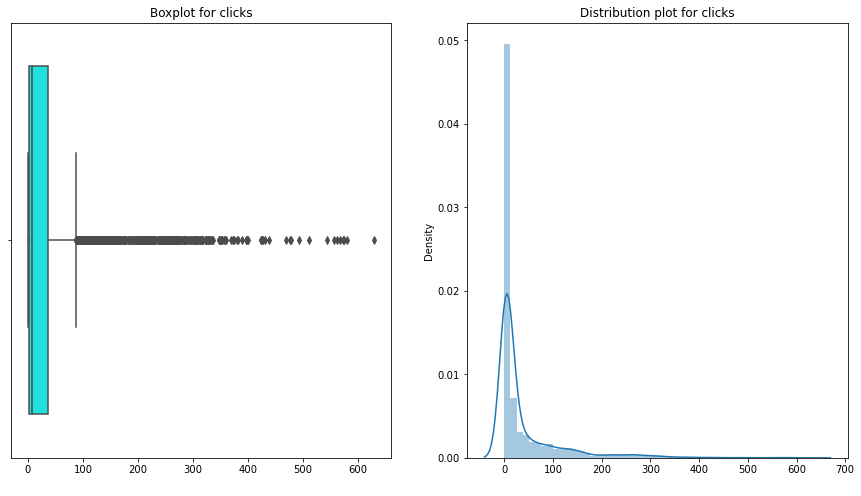

In [25]:
plot_helper('clicks',df)

In [26]:
df.clicks = np.log1p(df.clicks)

	 clicks 
 ******************************
count    4548.000000
mean        2.385350
std         1.610757
min         0.000000
25%         1.098612
50%         2.079442
75%         3.610918
90%         4.844187
95%         5.318120
97%         5.568345
99%         5.797666
99.5%       5.972743
max         6.445720
Name: clicks, dtype: float64


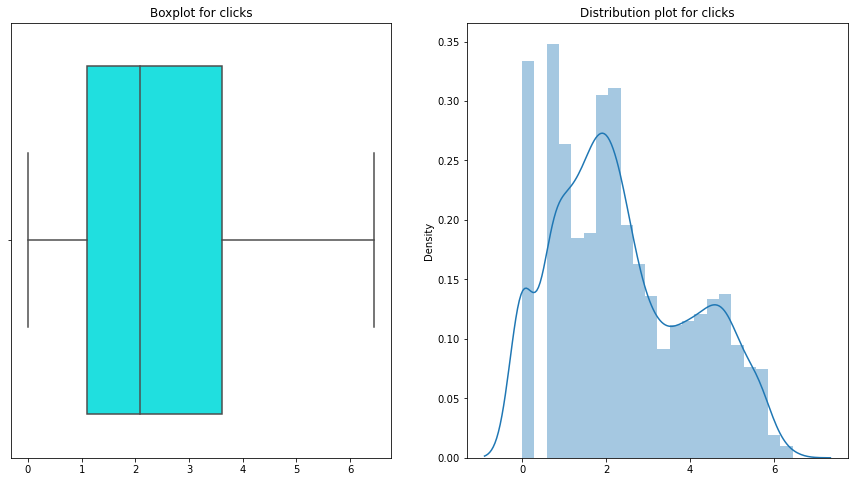

In [27]:
plot_helper('clicks',df)

	 cost 
 ******************************
count    4548.000000
mean        2.179903
std         7.435178
min         0.000000
25%         0.040000
50%         0.200000
75%         1.330000
90%         4.463000
95%         9.742000
97%        15.745900
99%        34.999000
99.5%      43.902000
max       144.970000
Name: cost, dtype: float64


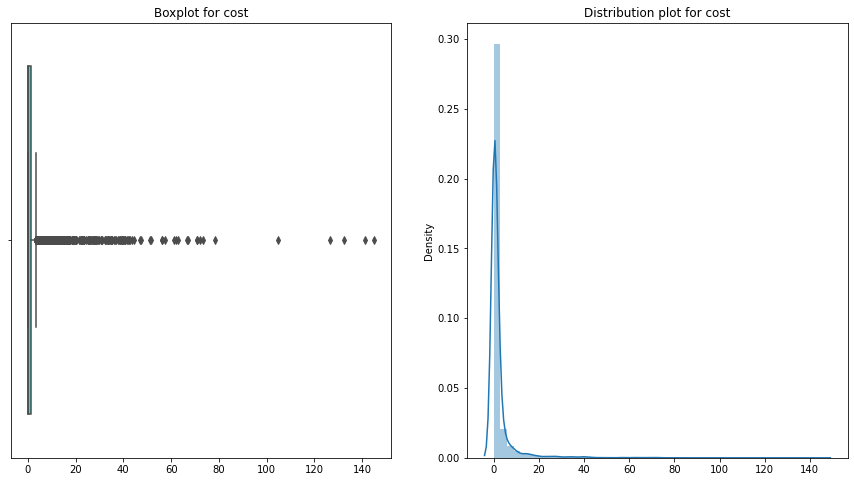

In [28]:
plot_helper('cost',df)

	 cost 
 ******************************
count    4525.000000
mean        1.805114
std         4.800726
min         0.000000
25%         0.040000
50%         0.200000
75%         1.290000
90%         4.202000
95%         8.728000
97%        14.191200
99%        27.748000
99.5%      34.954000
max        43.690000
Name: cost, dtype: float64


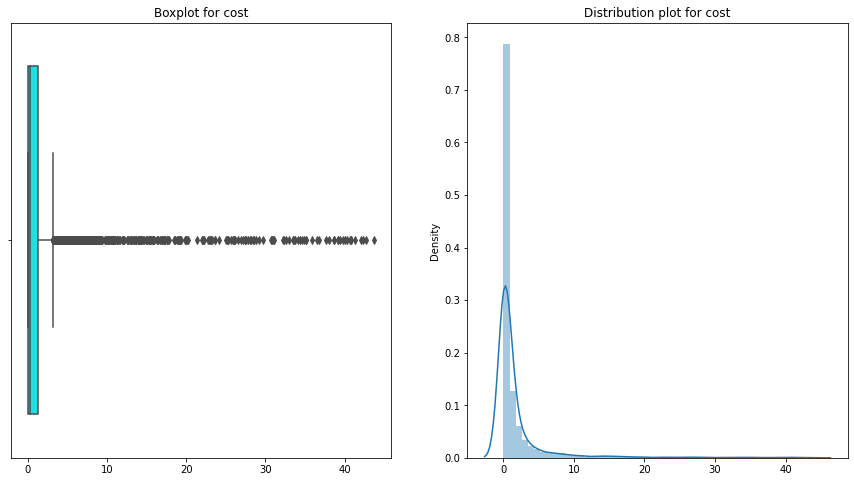

In [29]:
df = df[~(df['cost']>df['cost'].quantile(0.995))]
plot_helper('cost',df)

	 cost 
 ******************************
count    4525.000000
mean        0.561376
std         0.767631
min         0.000000
25%         0.039221
50%         0.182322
75%         0.828552
90%         1.649041
95%         2.275008
97%         2.720716
99%         3.358558
99.5%       3.582232
max         3.799750
Name: cost, dtype: float64


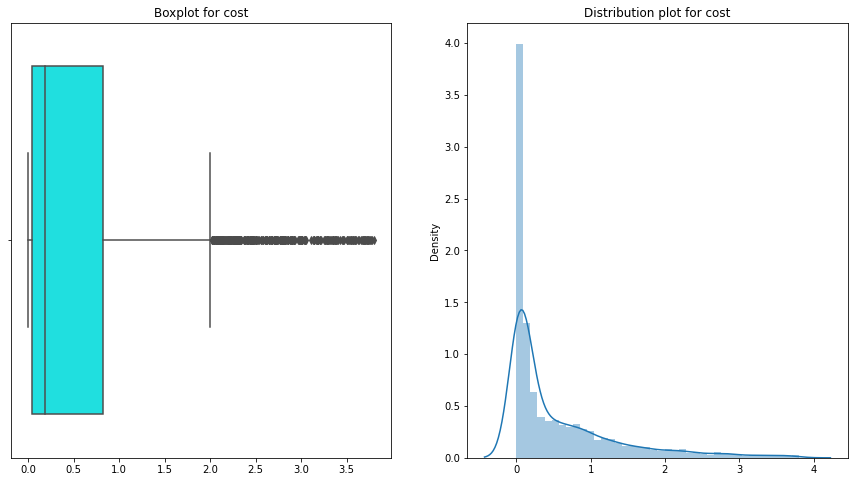

In [30]:
df.cost = np.log1p(df.cost)
plot_helper('cost',df)

	 conversions 
 ******************************
count    4525.000000
mean        0.990718
std         2.687348
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         3.000000
95%         6.000000
97%         7.000000
99%        11.000000
99.5%      18.000000
max        47.000000
Name: conversions, dtype: float64


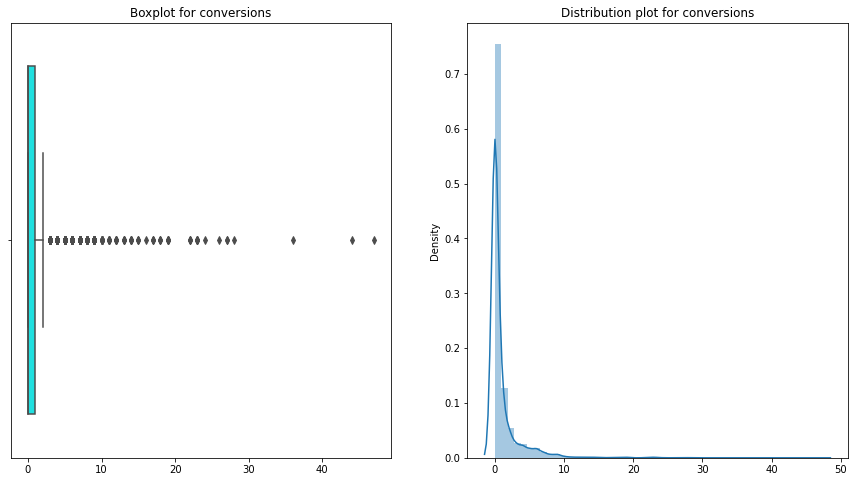

In [31]:
plot_helper('conversions',df)

	 conversions 
 ******************************
count    4504.000000
mean        0.876554
std         2.044115
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         3.000000
95%         5.000000
97%         7.000000
99%         9.000000
99.5%      12.000000
max        18.000000
Name: conversions, dtype: float64


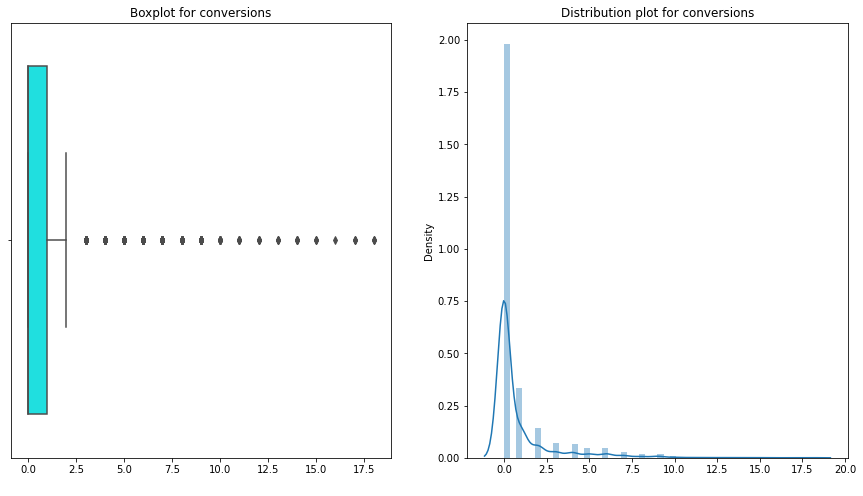

In [32]:
df = df[~(df['conversions']>df['conversions'].quantile(0.995))]
plot_helper('conversions',df)

	 conversions 
 ******************************
count    4504.000000
mean        0.350023
std         0.629963
min         0.000000
25%         0.000000
50%         0.000000
75%         0.693147
90%         1.386294
95%         1.791759
97%         2.079442
99%         2.302585
99.5%       2.564949
max         2.944439
Name: conversions, dtype: float64


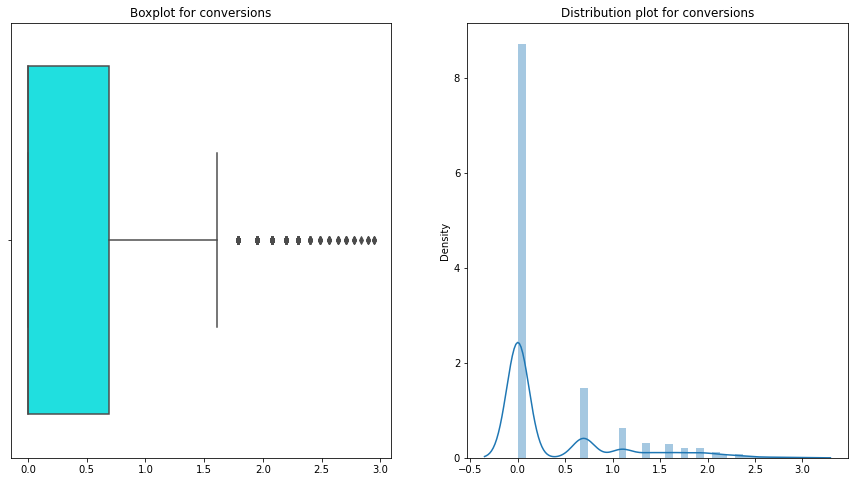

In [33]:
df.conversions = np.log1p(df.conversions)
plot_helper('conversions',df)

In [34]:
print(df.shape)
df.head(10)

(4504, 12)


,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,CTR,CPC,revenue,day_cos,day_sin
0,0,0,0,24,1.945910,0.076961,0.000000,0.250000,0.013333,0.00,-0.050649,0.998717
1,1,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.050649,0.998717
2,0,1,0,13,1.609438,0.039221,0.000000,0.307692,0.010000,0.00,-0.050649,0.998717
3,0,0,1,5,1.609438,0.076961,0.000000,0.800000,0.020000,0.00,-0.050649,0.998717
4,0,0,0,247,4.844187,0.828552,1.609438,0.510121,0.010238,925.71,-0.050649,0.998717
5,1,0,0,7,1.098612,0.039221,0.000000,0.285714,0.020000,0.00,-0.050649,0.998717
6,0,0,1,6,1.386294,0.048790,0.000000,0.500000,0.016667,0.00,-0.050649,0.998717
7,0,0,0,129,3.970292,0.457425,0.000000,0.403101,0.011154,0.00,-0.050649,0.998717
8,0,1,0,104,4.043051,0.444686,0.000000,0.538462,0.010000,0.00,-0.050649,0.998717
9,0,0,1,6,1.791759,0.048790,0.000000,0.833333,0.010000,0.00,-0.050649,0.998717


In [35]:
X = df.drop(['revenue'],axis=1)
y = df.revenue

### Feature Selection

#### RFE

In [36]:
lr = LinearRegression()
rfe = RFE(lr,5)
rfe.fit(X,y)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 5
Selected Features: [False False False False  True  True  True  True  True False False]
Feature Ranking: [5 3 4 7 1 1 1 1 1 6 2]


#### Extra trees feature importance

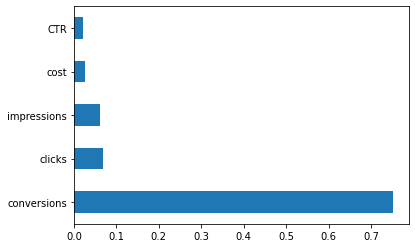

In [37]:
ext = ExtraTreesRegressor()
ext.fit(X,y)
imp = pd.Series(ext.feature_importances_,index=X.columns)
imp.nlargest(5).plot(kind='barh')
plt.show()

#### train test split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=33)
print(X_train.shape,X_test.shape)
X_train.head()

(4053, 11) (451, 11)


,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,CTR,CPC,day_cos,day_sin
1946,0,1,0,1,0.000000,0.000000,0.0,0.000000,0.000000,-0.612106,0.790776
4385,0,0,1,6,0.693147,0.009950,0.0,0.166667,0.010000,-0.440394,-0.897805
1412,0,1,0,18,2.484907,0.871293,0.0,0.611111,0.126364,-0.440394,-0.897805
2790,0,1,0,68,3.401197,0.336472,0.0,0.426471,0.013793,-0.954139,-0.299363
4263,1,0,0,11,1.609438,0.048790,0.0,0.363636,0.012500,-0.994869,-0.101168


In [39]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_train.head()

,adgroup 2,adgroup 3,adgroup 4,impressions,clicks,cost,conversions,CTR,CPC,day_cos,day_sin
0,-0.437845,1.322043,-0.489723,-0.537694,-1.483598,-0.728218,-0.556819,-1.871565,-0.431467,-0.701437,1.186717
1,-0.437845,-0.756405,2.041970,-0.502891,-1.045986,-0.715063,-0.556819,-1.161839,-0.357176,-0.460431,-1.253524
2,-0.437845,1.322043,-0.489723,-0.419363,0.085225,0.423670,-0.556819,0.730765,0.507307,-0.460431,-1.253524
3,-0.437845,1.322043,-0.489723,-0.071332,0.663717,-0.283387,-0.556819,-0.055501,-0.328996,-1.181497,-0.388690
4,2.283913,-0.756405,-0.489723,-0.468088,-0.467494,-0.663715,-0.556819,-0.323071,-0.338603,-1.238664,-0.102270


In [40]:
def evaluation(model,train_x,train_y,test_x,test_y,title='Default'):
    pred = model.predict(test_x)
    print('Training Score for '+ title+' :',model.score(train_x,train_y))
    print('Testing Score for '+ title+' :',model.score(test_x,test_y))
    print("RMSE for "+title+' :',np.sqrt(mean_squared_error(test_y,pred)))

### Linear Regression

In [41]:
lr = LinearRegression()
score = -np.mean(cross_val_score(lr,X,y,scoring='neg_root_mean_squared_error',cv=5))
print(np.sqrt(score))
lr.fit(X_train,y_train)
evaluation(lr,X_train,y_train,X_test,y_test,'Linear Regression')

13.953923320246188
Training Score for Linear Regression : 0.7121256935382296
Testing Score for Linear Regression : 0.7354894070601603
RMSE for Linear Regression : 165.5909928381587


In [42]:
temp = pd.DataFrame(lr.predict(X_train))
s = cross_val_score(lr,X,y,scoring='neg_root_mean_squared_error',cv=5)

In [43]:
s

array([-287.93431084, -204.41818403, -181.34541375, -149.16177318,
       -150.70019833])

In [44]:
print(np.sqrt(mean_squared_error(y_train,lr.predict(X_train))))

194.67354228531093


### Ridge

In [45]:
ridge = Ridge()
param = {'alpha':[1e-5,1e-3,1e-2,1e-1,1,10,100]}
ridge = GridSearchCV(ridge,param,scoring='neg_root_mean_squared_error',cv=5)
ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [46]:
print(ridge.best_estimator_)
print(np.sqrt(-ridge.best_score_))

Ridge(alpha=1)
13.966213540947734


In [47]:
evaluation(ridge,X_train,y_train,X_test,y_test,'Ridge Regression')

Training Score for Ridge Regression : -194.6735998792891
Testing Score for Ridge Regression : -165.57841730416405
RMSE for Ridge Regression : 165.57841730416405


In [48]:
print(np.sqrt(mean_squared_error(y_train,ridge.predict(X_train))))

194.6735998792891


### Lasso

In [49]:
lasso = Lasso()
lasso = GridSearchCV(lasso,param,scoring='neg_root_mean_squared_error',cv=5)
lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [50]:
print(lasso.best_estimator_)
print(np.sqrt(-lasso.best_score_))

Lasso(alpha=0.1)
13.966143524170123


In [51]:
evaluation(lasso,X_train,y_train,X_test,y_test,'Lasso Regression')

Training Score for Lasso Regression : -194.6748599511841
Testing Score for Lasso Regression : -165.5406114061066
RMSE for Lasso Regression : 165.5406114061066


In [52]:
print(np.sqrt(mean_squared_error(y_train,lasso.predict(X_train))))

194.6748599511841


### DecisionTree Regressor

In [53]:
dtr = DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt_cv = GridSearchCV(dtr,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5)

In [ ]:
dt_cv.fit(X_train,y_train)

In [ ]:
print(dt_cv.best_params_)
print(dt_cv.best_score_)

In [ ]:
dtr = dt_cv.best_estimator_
evaluation(dtr,X_train,y_train,X_test,y_test,'Decision tree regressor')

### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfr_cv = RandomizedSearchCV(rfr,param_distributions=parameters,scoring='neg_root_mean_squared_error',cv=5,n_iter=100,n_jobs=-1,
                            verbose=2, random_state=32)
rfr_cv.fit(X_train,y_train)

In [ ]:
rfr_param_grid = {'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [100, 200, 300, 1000]}
rfr = RandomForestRegressor()
rfr_cv = GridSearchCV(rfr,param_grid=rfr_param_grid,scoring='neg_root_mean_squared_error',cv=5)
rfr_cv.fit(X_train,y_train)

In [ ]:
print(rfr_cv.best_params_)
print(rfr_cv.best_score_)

In [ ]:
rfr = rfr_cv.best_estimator_

In [ ]:
evaluation(rfr,X_train,y_train,X_test,y_test,'Random Forest')

### Bagging Regressor

In [ ]:
br = BaggingRegressor()
br_params = {'n_estimators': [20,50,100,200],
        "max_features":[1,2,4,6,8],
        "max_samples": [0.5,0.1],
        "bootstrap": [True, False],
        "bootstrap_features": [True, False]}
br_cv = GridSearchCV(br,param_grid=br_params,cv=5,scoring='neg_root_mean_squared_error')
br_cv.fit(X_train,y_train)

In [ ]:
print(br_cv.best_params_)
print(br_cv.best_score_)

In [ ]:
br = br_cv.best_estimator_
evaluation(br,X_train,y_train,X_test,y_test,'Bagging Regressor')

### AdaBoost

In [ ]:
ada = AdaBoostRegressor()
ada_params = {'learning_rate':[0.05,0.1,0.2,0.6,0.8,1],
        'n_estimators': [50,60,100],
        'loss' : ['linear', 'square', 'exponential']}
ada_cv = GridSearchCV(ada,param_grid=ada_params,scoring='neg_root_mean_squared_error',cv=5)
ada_cv.fit(X_train,y_train)

In [ ]:
print(ada_cv.best_params_)
print(ada_cv.best_score_)

In [ ]:
ada = ada_cv.best_estimator_
evaluation(ada,X_train,y_train,X_test,y_test,'AdaBoost Regressor')

### GradientBoosting Regressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr_params = {"max_depth": [3,5,6,7],
        "max_features":['auto', 'sqrt', 'log2'],
        "min_samples_split": [2, 3, 10],
        "min_samples_leaf": [1, 3, 10],
        'learning_rate':[0.05,0.1,0.2],
        'n_estimators': [10,30,50,70]}
gbr_cv = GridSearchCV(gbr,param_grid=gbr_params,cv=5,scoring='neg_root_mean_squared_error')
gbr_cv.fit(X_train,y_train)

In [ ]:
print(gbr_cv.best_params_)
print(gbr_cv.best_score_)

In [ ]:
gbr = gbr_cv.best_estimator_
evaluation(gbr,X_train,y_train,X_test,y_test,'GradientBoosting Regressor')

### XGBoost

In [ ]:
xg = XGBRegressor()
xg_params =  {"max_depth": [3,4,5,6,7,8],
         "min_child_weight" : [4,5,6,7,8],
        'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],
        'n_estimators': [10,30,50,70,80,100]}
xg_cv = GridSearchCV(xg,param_grid=xg_params,cv=5,scoring='neg_root_mean_squared_error')
xg_cv.fit(X_train,y_train)

In [ ]:
print(xg_cv.best_params_)
print(xg_cv.best_score_)

In [ ]:
xg = xg_cv.best_estimator_
evaluation(xg,X_train,y_train,X_test,y_test,'XGBoost Regressor')

### Extra Tree Regressor

In [ ]:
# extr = ExtraTreesRegressor()
# extra_params = {'n_estimators': [10,50,100],
#             'criterion': ['mse', 'mae'],
#             'max_depth': [2,8,16,32,50],
#             'min_samples_split': [2,4,6],
#             'min_samples_leaf': [1,2],
#             'max_features': ['auto','sqrt','log2'],    
#             'bootstrap': [True, False],
#             'warm_start': [True, False]}
# extr_cv = GridSearchCV(extr,param_grid=extra_params,cv=5,scoring='neg_root_mean_squared_error')
# extr_cv.fit(X_train,y_train)

In [ ]:
# print(extr_cv.best_params_)
# print(extr_cv.best_score_)

In [ ]:
# extr = extr_cv.best_estimator_
# evaluation(extr,X_train,y_train,X_test,y_test,'Extra Tree Regressor')

### Testing data on model

In [ ]:
orig_test_df = pd.read_csv('Test_Data.csv')
print(orig_test_df.shape)
orig_test_df.head(10)

In [ ]:
orig_test_df['date'] = pd.to_datetime(orig_test_df.date)
orig_test_df.info()

In [ ]:
date = pd.DataFrame(orig_test_df.date)
temp = pd.get_dummies(orig_test_df.adgroup,drop_first=True)
temp = pd.concat([date,temp],axis=1)
orig_test_df.drop(['date','adgroup'],axis=1,inplace=True)
orig_test_df = pd.concat([temp,orig_test_df],axis=1)
orig_test_df.head()

In [ ]:
orig_test_df['CTR'] = orig_test_df['clicks'].astype(float)/orig_test_df['impressions'].astype(float)
orig_test_df['CPC'] = orig_test_df['cost'].astype(float)/orig_test_df['clicks'].astype(float)
orig_test_df.drop(['campaign','ad'],axis=1,inplace=True)
orig_test_df.CPC = orig_test_df.CPC.fillna(0)
orig_test_df.head()

In [ ]:
orig_test_df.isna().sum()

In [ ]:
day = orig_test_df.date.dt.day
day.name = 'day'
month = orig_test_df.date.dt.month
month.name = 'month'
orig_test_df = pd.concat([day,month,orig_test_df],axis=1)
orig_test_df.drop(['date'],axis=1,inplace=True)
orig_test_df.head()

#### transformations

In [ ]:
orig_test_df.clicks = np.log1p(orig_test_df.clicks)
orig_test_df.cost = np.log1p(orig_test_df.cost)
orig_test_df.conversions = np.log1p(orig_test_df.conversions)
print(orig_test_df.shape)
orig_test_df.head(10)

In [ ]:
X_train.head()

In [ ]:
orig_test_df['day_cos'] = np.cos(2*np.pi*orig_test_df.day/31.0)
orig_test_df['day_sin'] = np.sin(2*np.pi*orig_test_df.day/31.0)
orig_test_df.drop(['day','month'],axis=1,inplace=True)
model_test = orig_test_df.copy()
model_test.head()

### scaling

In [ ]:
X_test = pd.DataFrame(scaler.transform(orig_test_df),columns=orig_test_df.columns)
model_test = X_test[['adgroup 2','adgroup 3', 'adgroup 4','impressions','clicks','cost','conversions','CTR','CPC',
                 'day_cos','day_sin']]
model_test.head()

### Random Forest Prediction Series

In [ ]:
rfr_pred = pd.DataFrame(rfr.predict(model_test))
rfr_pred.index = model_test.index
rfr_pred.columns = ['revenue']
rfr_pred.to_csv('rfr.csv',index=False)

In [ ]:
temp = pd.read_csv('rfr.csv')
temp.head(10)

### GradientBoosting Prediction Series

In [ ]:
gbr_pred = pd.DataFrame(gbr.predict(model_test))
gbr_pred.index = model_test.index
gbr_pred.columns = ['revenue']
gbr_pred.to_csv('gbr.csv',index=False)

In [ ]:
temp = pd.read_csv('gbr.csv')
temp.head(10)

### XGBoost Prediction Series

In [ ]:
xg_pred = pd.DataFrame(xg.predict(model_test))
xg_pred.index = model_test.index
xg_pred.columns = ['revenue']
xg_pred.to_csv('xg.csv',index=False)

In [ ]:
temp = pd.read_csv('xg.csv')
temp.head(10)

### Laso Prediction Series

In [ ]:
laso_pred = pd.DataFrame(lasso.predict(model_test))
laso_pred.index = model_test.index
laso_pred.columns = ['revenue']
laso_pred.to_csv('lasso.csv',index=False)

In [ ]:
temp = pd.read_csv('lasso.csv')
temp.head(10)

### Linear Regression Prediction Series

In [ ]:
lr_pred = pd.DataFrame(lr.predict(model_test))
lr_pred.index = model_test.index
lr_pred.columns = ['revenue']
lr_pred.to_csv('lr.csv',index=False)

In [ ]:
temp = pd.read_csv('lr.csv')
temp.head(10)

## Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
models = [('lasso',Lasso(alpha=0.1),
           ('rf',RandomForestRegressor(bootstrap= True, max_depth= 100, max_features= 3, min_samples_leaf= 3,
                                       min_samples_split= 8, n_estimators= 100)),
          ('gbm',GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, max_features= 'auto', min_samples_leaf= 3,
                                             min_samples_split= 10, n_estimators=50)),
          ('xgb',XGBRegressor(learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 80)))]

In [ ]:
stack = StackingRegressor(estimators=models,final_estimator=XGBRegressor(learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 80),cv=5)
stack.fit(X_train,y_train)
evaluation(stack,X_train,y_train,X_test,y_test,'Stacking Regressor')